In [1]:
import pandas as pd 
import numpy as np
import pandas_profiling as pf
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Analytics For Financial Markets(823)/Team Assignment 2/Bankruptcy_data_Final.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  92872 non-null  int64  
 1   Tobin's Q           92620 non-null  float64
 2   EPS                 92867 non-null  float64
 3   Liquidity           92625 non-null  float64
 4   Profitability       92625 non-null  float64
 5   Productivity        92625 non-null  float64
 6   Leverage Ratio      92846 non-null  float64
 7   Asset Turnover      92625 non-null  float64
 8   Operational Margin  87315 non-null  float64
 9   Return on Equity    92864 non-null  float64
 10  Market Book Ratio   92815 non-null  float64
 11  Assets Growth       86171 non-null  float64
 12  Sales Growth        86171 non-null  float64
 13  Employee Growth     85862 non-null  float64
 14  BK                  92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


In [3]:
df.describe()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92872.000000,92620.000000,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,2004.105888,25.369008,-14.461355,-2.631237,-29.537274,-1.222871,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294077,1.900109,0.343320,0.006008
std,9.875926,902.818813,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,1979.000000,0.009000,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431000,-1.000000,0.000000
25%,1998.000000,1.120000,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.053000,-0.034000,-0.048000,0.000000
50%,2006.000000,1.540000,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.052000,0.060000,0.017000,0.000000
75%,2012.000000,2.590000,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192000,0.204000,0.131000,0.000000
max,2017.000000,194537.670000,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [ ]:
pf.ProfileReport(df)

In [4]:
pd.isna(df).sum()

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [5]:
df=df.fillna(df.mean())

In [6]:
pd.isna(df).sum()

Data Year - Fiscal    0
Tobin's Q             0
EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [7]:
df1=df.drop(['Data Year - Fiscal'],axis=1)

In [8]:
df1

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,0.980,1.580,0.360,0.180,0.130,1.330,1.770,0.070,0.150,2.220,1.294077,1.900109,0.34332,0
1,0.980,1.410,0.360,0.190,0.120,1.310,1.590,0.070,0.130,2.410,0.126000,0.014000,0.04000,0
2,0.870,0.310,0.320,0.130,0.080,1.030,1.550,0.050,0.040,2.560,0.368000,0.328000,0.56700,0
3,1.130,0.710,0.280,0.140,0.080,0.800,1.390,0.060,0.050,5.280,-0.021000,-0.119000,-0.09600,0
4,1.260,0.750,0.410,0.130,0.080,0.200,1.300,0.060,0.040,8.680,0.233000,0.147000,0.05300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,1.521,-1.488,-0.015,-0.759,-0.057,-1042.105,0.174,-0.327,-6.614,-1.847,-0.073000,-0.557000,-0.07700,0
92868,1.988,-1.808,0.094,-1.205,-0.121,-4.530,0.216,-0.561,-4.519,-2.475,-0.202000,-0.011000,-0.20800,0
92869,0.924,-0.016,0.039,0.000,-0.082,0.745,0.254,-0.324,-0.569,3274.506,-0.168000,-0.020000,-0.10500,0
92870,0.788,-0.133,0.054,-0.029,0.001,0.575,0.196,0.005,-0.086,36.475,0.077000,-0.171000,-0.05900,0


In [9]:
df1.head()

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,1.294077,1.900109,0.34332,0
1,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126000,0.014000,0.04000,0
2,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368000,0.328000,0.56700,0
3,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021000,-0.119000,-0.09600,0
4,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233000,0.147000,0.05300,0


In [10]:
df1['BK'].value_counts()

0    92314
1      558
Name: BK, dtype: int64

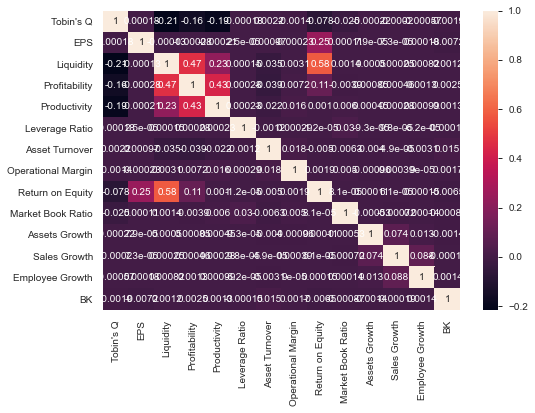

In [11]:
corrmat=df1.corr(method='pearson')

sn.heatmap(corrmat,annot=True)

plt.show()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tobin's Q           92872 non-null  float64
 1   EPS                 92872 non-null  float64
 2   Liquidity           92872 non-null  float64
 3   Profitability       92872 non-null  float64
 4   Productivity        92872 non-null  float64
 5   Leverage Ratio      92872 non-null  float64
 6   Asset Turnover      92872 non-null  float64
 7   Operational Margin  92872 non-null  float64
 8   Return on Equity    92872 non-null  float64
 9   Market Book Ratio   92872 non-null  float64
 10  Assets Growth       92872 non-null  float64
 11  Sales Growth        92872 non-null  float64
 12  Employee Growth     92872 non-null  float64
 13  BK                  92872 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 9.9 MB


In [13]:
df1_features=df1.iloc[:,0:13]

df1_target=df1.iloc[:,13]

In [14]:
df1_features.head()

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,1.294077,1.900109,0.34332
1,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126000,0.014000,0.04000
2,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368000,0.328000,0.56700
3,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021000,-0.119000,-0.09600
4,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233000,0.147000,0.05300


In [15]:
df1_target.head()

0    0
1    0
2    0
3    0
4    0
Name: BK, dtype: int64

In [16]:

# Split the data into training and testing sets

train_features, test_features, train_target, test_target = train_test_split(df1_features, df1_target, test_size = 0.25,random_state=42,stratify=df1['BK'].values)





In [17]:
pd.Series(train_target).value_counts()

0    69235
1      419
Name: BK, dtype: int64

In [18]:
sm = SMOTE(random_state = 33)

train_features_new, train_target_new = sm.fit_sample(train_features, train_target.ravel())

In [19]:
pd.Series(train_target_new).value_counts()

1    69235
0    69235
dtype: int64

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

print(random_grid)


In [ ]:
# Use the GridSearch to search for best hyperparameters

rf_model = RFC(random_state=42)

rf = GridSearchCV(rf_model,random_grid, cv=3,verbose=10,scoring='roc_auc')

# Fit the random search model
rf.fit(train_features_new, train_target_new)

In [ ]:
rf.best_params_

In [ ]:
rf.best_estimator_

In [ ]:
rf_pred=rf.predict(test_features)

In [ ]:
cm_rf=mt.confusion_matrix(test_target,rf_pred,labels=[0,1])

#Bakrupt:1, Not_Bankrupt:0
ax= plt.subplot() 
sn.heatmap(cm_rf, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells 
# labels, title and ticks 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']); 
ax.yaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']);

In [ ]:
mt.roc_auc_score(test_target,rf_pred)

In [ ]:
mt.f1_score(test_target,rf_pred)

In [ ]:
mt.precision_score(test_target,rf_pred)

In [ ]:
mt.recall_score(test_target,rf_pred)

In [ ]:
# Defining SVM hyperparameter range
svm_grid = {'C': [0.1, 1, 10, 20, 90,100,120], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svm_model=SVC(random_state=42)  
svm = GridSearchCV(svm_model, svm_grid, refit = True, verbose = 10,scoring='roc_auc')
  
# fitting the model for grid search
svm.fit(train_features_new, train_target_new)

In [ ]:
svm.best_params_ 

In [ ]:
svm.best_estimator_

In [ ]:
svm_predictions=svm.predict(test_features)

In [ ]:
cm_svm=mt.confusion_matrix(test_target,svm_predictions,labels=[0,1])

#Bankrupt:1, Not_Bankrupt:0
ax= plt.subplot() 
sn.heatmap(cm_svm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells 
# labels, title and ticks 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']); 
ax.yaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']);



In [ ]:
mt.roc_auc_score(test_target,svm_predictions)

In [ ]:
mt.f1_score(test_target,svm_predictions)

In [ ]:
mt.precision_score(test_target,svm_predictions)

In [ ]:
mt.recall_score(test_target,svm_predictions)

In [ ]:
import xgboost as xgb

boost_grid = {'nthread': [4], 
              'objective': ['binary:logistic'],
              'learning_rate':[0.02,0.03,0.05,0.1,0.5,0.75],
              'max_depth': [3,5,6,10],
              'subsample':[0.5,0.8,1],
              'colsample_bytree':[0.5,0.7,1],
              'n_estimators':[int(x) for x in np.linspace(start = 5, stop = 100, num = 10)],
               } 
xgb_model=xgb.XGBClassifier(random_state=42)  


xgb = GridSearchCV(xgb_model, boost_grid, refit = True, verbose = 10,cv=3)
  
# fitting the model for grid search
xgb.fit(train_features_new, train_target_new)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.850, total=   1.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.848, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.856, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.847, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.847, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.855, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.2s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.848, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.851, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.2s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.848, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.7s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.861, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.862, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.858, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.870, total=   2.0s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.868, total=   2.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.866, total=   2.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.871, total=   3.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.874, total=   3.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.875, total=   3.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.875, 

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.883, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.880, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.879, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.893, total= 

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.898, total=   2.7s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.900, total=   3.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.903, total=   3.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.910, total=   5.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.908, total=   5.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.910, total=   6.0s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.900, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.899, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.895, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.902, tot

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.915, total=   3.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.918, total=   3.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.918, total=   3.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.916, tota

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.926, total=   6.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.925, total=   6.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.927, total=   6.4s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.930

In [ ]:
xgb.best_params_

In [ ]:
xgb.best_estimator_

In [ ]:
xgb_pred=xgb.predict(test_features)

In [ ]:
cm_xgb=mt.confusion_matrix(test_target,xgb_pred,labels=[0,1])

#Bankrupt:1, Not_Bankrupt:0
ax= plt.subplot() 
sn.heatmap(cm_xgb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells 
# labels, title and ticks 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']); 
ax.yaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']);



In [ ]:
mt.roc_auc_score(test_target,xgb_pred)

In [ ]:
mt.f1_score(test_target,xgb_pred)

In [ ]:
mt.precision_score(test_target,xgb_pred)

In [ ]:
mt.recall_score(test_target,xgb_pred)